In [29]:
# import modules for working with data
import pandas as pd
import numpy as np

# import stats functions from scipy
from scipy import stats

# imports for better control of output and plots
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# show plots in the notebook
%matplotlib inline

# WSTĘPNA ANALIZA

In [30]:
DATA_PATH = '../data/KaggleV2-May-2016.csv'
df = pd.read_csv(DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [31]:
# show data structure
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Każdy wiersz posiada ID Pacjenta oraz ID wizyty. ID Pacjenta raczej nie jest unikalne, natomiast można założyć logicznie, że każda wizyta ma swoje unikalne ID

In [32]:
print(df.loc[:, ['PatientId', 'AppointmentID']].nunique())
print(f'liczba rekordów: {len(df)}')

PatientId         62299
AppointmentID    110527
dtype: int64
liczba rekordów: 110527


Widać że rekordów jest tyle samo co unikalnych ID wizyty, zatem każda wizyta ma dokładnie jedno ID. Zrobimy reset indeksów na podstawie kolumny AppointmentID

In [33]:
df.set_index('AppointmentID', inplace=True ,verify_integrity=True)

# CZYSZCZENIE DANYCH

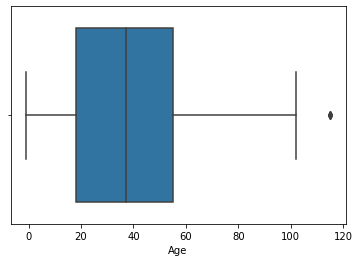

In [34]:
# create a boxplot of the age using seaborn
sns.boxplot(df.Age)
plt.show()

Na podstawie boxplotu widać jak są rozmieszczone dane pacjentów. Widać wyraźnych outliersów, conajmniej jedna osoba ma wiek poniżej zera oraz conajmniej jedna zbliża się do wieku 120 lat. Niewiele jest osób żyjących ponad 100 lat. Sprawdźmy kto to

In [35]:
df[df.Age < 0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5775010,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [36]:
df[df.Age > 100]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5651757,9.762948e+14,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
5700278,3.196321e+13,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
5700279,3.196321e+13,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
5562812,3.196321e+13,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
5744037,3.196321e+13,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
5751563,2.342836e+11,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
5717451,7.482346e+14,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


Dwie Pacjenti 102 letnie być może faktycznie nie są błędem przygotowania bazy, natomiast spokojnie możemy założyć, że pacjenci 115 letni oraz pacjent -1 letni są outliersami więc usuniemy ich z naszej bazy aby nie zaburzać wyniku testu

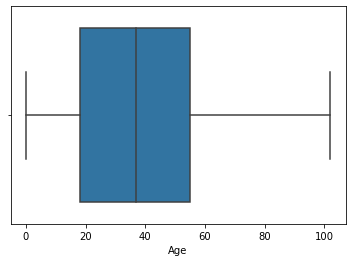

In [37]:
df = df[(df.Age > -1) & (df.Age < 115)]

# display the boxplot again to verify the outcome
sns.boxplot(df.Age)
plt.show()

Przekształćmy dane tak aby się na nich dalej wygodnie pracowało ScheduleDay i AppointmentDay zamieńmy na DateTime, Zmienną NoShow zamieńmy na binarną daną. Dodajmy też w jakie dni tygodnia odbywają się wizyty.

In [38]:
df.loc[:, ['ScheduledDay', 'AppointmentDay']] = df.loc[:, ['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)
df.rename(columns={'No-show':'NoShow'}, inplace=True)
day_from_datetime = lambda dt: dt.day_name()
df['DayOfWeek'] = df.AppointmentDay.apply(day_from_datetime)
df['BinNoShow'] = (df.NoShow == "Yes").astype(int)


# Analiza danych

Przebadajmy dane sprawdzając ich istotność. W tym celu zastosujemy test chi-square aby zobaczyć czy różnice w wynikach są statystycznie istotne

In [45]:
def chi_test(colA, colB):
    """
    Performs a chi-quare test between the values of two columns
    :param colA: First column of test
    :param colB: Second column of test
    """
    
    # The first step is to create a contingecy table tabulated from the distribution of the values
    contingency_table = pd.crosstab(colA, colB)

    # Display the table
    display(contingency_table)

    # use scipy to calculate the chi test statistic, p_value and degrees of freedom    
    chi2, p_value, dof, _ = stats.chi2_contingency(contingency_table, False)

    # Output a summary of the results
    print('The chi-square test returned a value of {:.2f} and was performed with {} degree(s) of freedom.'.format(chi2, dof))
    print('The p-value was {:.3f}'.format(p_value))

Zobaczmy jaki jest rozkład nie pojawiania się na wizytach

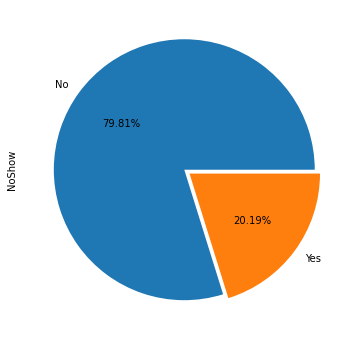

In [39]:
df.NoShow.value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

Przeanalizujmy jak rozkłada liczba wizyt na poszczególne dni

In [43]:
df.DayOfWeek.value_counts()

Wednesday    25867
Tuesday      25640
Monday       22712
Friday       19018
Thursday     17245
Saturday        39
Name: DayOfWeek, dtype: int64

Sprawdźmy czy wysłane powiadomienie sms miało wpływ na pojawienie się pacjenta na wizycie

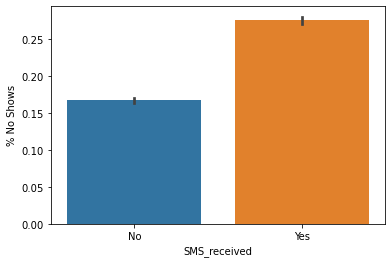

In [44]:
yesno = {1:'Yes', 0:'No'}
ax = sns.barplot(x=df.SMS_received.map(yesno), y=df.BinNoShow)
ax.set_ylabel('% No Shows')
plt.show()

Co ciekawe gdy pacjenci dostawali powiadomie sms częście opuszczali wizyty. Sprawdźmy czy otrzymany wynik jest statystycznie istotny

In [47]:
chi_test(df.NoShow, df.SMS_received.map(yesno))

SMS_received,No,Yes
NoShow,,
No,62508,25697
Yes,12532,9784


The chi-square test returned a value of 1767.97 and was performed with 1 degree(s) of freedom.
The p-value was 0.000


p-value jest niższa niż przyjęty w naukach biologicznych poziom 0.05 zatem test uznajemy za statystycznie istotny. Wysłanie SMS faktycznie mogło mieć wpływ na to że pacjenci pojawiali się rzadziej na wizytyach.